# Sampling in Python

Pengambilan sampel dengan Python adalah landasan statistik inferensi dan pengujian hipotesis. Ini merupakan keterampilan yang digunakan dalam analisis survei dan desain eksperimental untuk menarik kesimpulan tanpa mensurvei seluruh populasi.

In [1]:
# Importing pandas
import pandas as pd

# Importing Data
attrition = pd.read_feather("Data/attrition.feather")
spotify = pd.read_feather("Data/spotify_2000_2020.feather")
coffee = pd.read_feather("Data/coffee_ratings_full.feather")

## Introduction to Sampling
Pengenalan kepada sampling dan mempelajari permasalahan yang disebabkan oleh *convenience sampling* (Sampling Kebetulan) dan mempelajari perbedaan antara *true randomness* dan *pseudo-randomness*

### Sampling and point estimates

- **Sampling** adalah proses di mana porsi dari suatu populasi diseleksi agar dapat mewakilkan populasi tersebut.
- **Population** adalah seluruh bagian data yang lengkap
  - Tidak harus mengacu kepada orang
  - Biasanya, kita tidak tahu berapa jumlah pasti dari seluruh populasi
- **Sample** merupakan bagian kecil dari populasi yang dianggap dapat mewakilkan seluruh populasi

Sampling tidak disarankan dilakukan ketika populasi/data yang dimiliki berjumlah sedikit

#### Sampling sederhana dengan Pandas

In [2]:
# Sample 1000 baris dari data spotify
spotify_sample = spotify.sample(n=1000)

# Hitung rata - rata dari kolom 'duration_minutes' dari data spotify
mean_dur_pop = spotify["duration_minutes"].mean()

# Hitung rata - rata dari kolom 'duration_minutes' dari data spotify sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(f'Rata - rata durasi dari populasi : {mean_dur_pop}')
print(f'Rata - rata durasi dari sample   : {mean_dur_samp}')

Rata - rata durasi dari populasi : 3.8521519140900073
Rata - rata durasi dari sample   : 3.9603390833333334


Dapat terlihat bahwa nilai rata rata dari **sample** dan **populasi** terlihat mendekati namun tidak sama persis

#### Sampling sederhana dengan Numpy

In [3]:
#Import numpy
import numpy as np

# Buat series pandas dari kolom 'loudness' dari data populasi
loudness_pop = spotify['loudness']

# Sample 100 nilai dari loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Hitung rata - rata loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Hitung rata - rata loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(f'Rata - rata loudness dari populasi : {mean_loudness_pop}')
print(f'Rata - rata loudness dari sample   : {mean_loudness_samp}')

Rata - rata loudness dari populasi : -7.366856851353947
Rata - rata loudness dari sample   : -7.37861


Dapat terlihat lagi bahwa nilai rata rata dari **sample** dan **populasi** terlihat mendekati namun tidak sama persis

### Convenience Sampling

- Convenience Sampling adalah pengambilan sampel secara bebas 
- Teknik pengambilan sampel yang paling umum digunakan karena sangat cepat, tidak rumit, dan ekonomis.
- Namun teknik ini, rentan terhadap terjadinya *sample bias* atau sample tidak representatif terhadap populasi

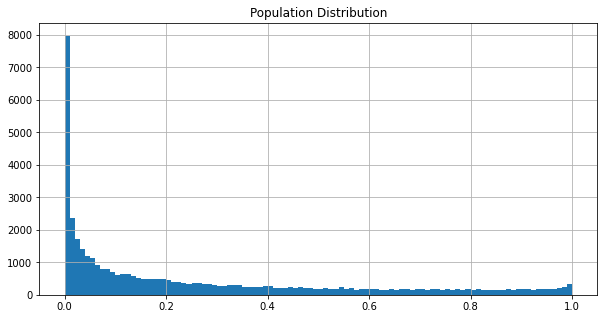

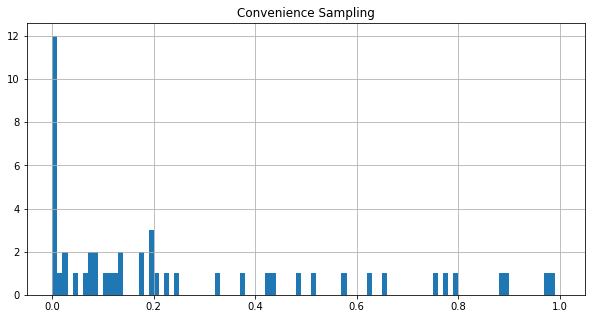

In [4]:
#Import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
spotify['acousticness'].hist(bins=np.arange(0,1.01,0.01))
plt.title("Population Distribution")
plt.show()


plt.figure(figsize=(10,5))
spotify_acousticness_sample = spotify.head(50)
spotify_acousticness_sample['acousticness'].hist(bins=np.arange(0,1.01,0.01))
plt.title("Convenience Sampling")
plt.show()

### Pseudo-random number generation

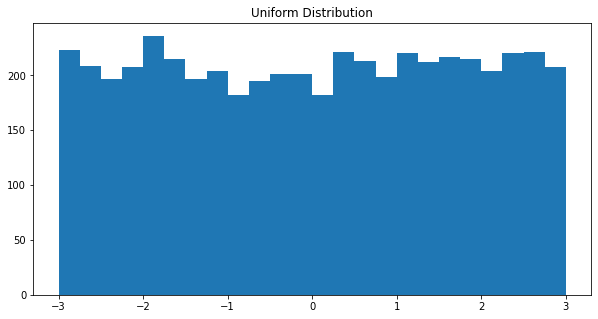

In [5]:
# Buat bilangan acak dengan distribusi uniform dengan bilangan paling kecil -3 dan paling besar 3
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Buat histogram dari nilai uniforms
plt.figure(figsize=(10,5))
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.title("Uniform Distribution")
plt.show()

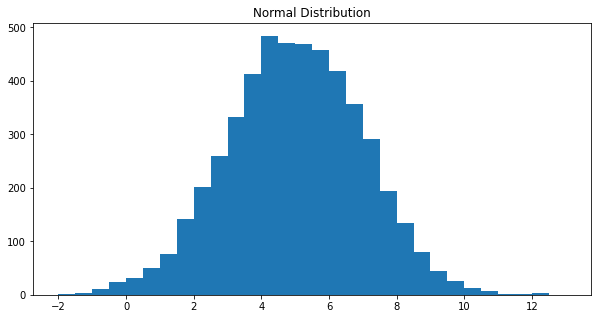

In [6]:
normals = np.random.normal(loc=5, scale=2, size=5000)

plt.figure(figsize=(10,5))
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.title("Normal Distribution")
plt.show()

#### Memahami Random Seed

Random seed berguna agar bilangan acak dapat dihasilkan kembali

In [7]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
print(f'X : {x}')

np.random.seed(456)
y = np.random.normal(size=5)
print(f'Y : {y}')

X : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
Y : [-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


Seed yang berbeda akan menghasilkan bilangan acak yang berbeda juga

In [8]:
np.random.seed(123)
x = np.random.normal(size=5)
print(f'X : {x}')

np.random.seed(123)
y = np.random.normal(size=5)
print(f'Y : {y}')

X : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
Y : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


Ketika memakai nilai seed yang sama maka bilangan random akan sama

## Sampling Methods
Menjelaskan dan mempraktikan 4 metode sampling menggunakan Python:
- Simple Sampling
- Systematic Sampling
- Stratified Sampling
- Cluster Sampling

### Simple random dan systematic sampling

#### **Simple Random Sampling**
- Salah satu metode *sampling* yang paling sederhana
- Bekerja dengan cara memilih *sample* secara acak dan setiap *sample* memiliki kemungkinan yang sama untuk dipilih

In [9]:
# Sample 50 baris menggunakan Simple Random Sampling 
attrition_samp = attrition.sample(n=50,random_state=18900217)

# Print the sample
attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


Terlihat bahwa index tiap baris yang terambil secara acak 

#### **Systematic Sampling**
- Suatu metode pengambilan sampel, dimana hanya unsur pertama saja dari sampel dipilih secara acak, sedangkan unsur-unsur selanjutnya dipilih secara sistematis menurut pola tertentu.

In [10]:
# Buat ukuran sample sebesar 70
sample_size = 70

# Tampung ukuran populasi ke variabel pop_size
pop_size = len(attrition)

# Hitung interval
interval = pop_size // sample_size

# Sampel 70 baris secara sistematis
attrition_sys_samp = attrition.loc[::interval]


attrition_sys_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


*Systematic Sampling* memiliki masalah: jika data telah diurutkan, atau ada semacam pola atau makna di balik urutan baris, maka sampel yang dihasilkan mungkin tidak mewakili keseluruhan populasi. Masalahnya dapat diselesaikan dengan mengacak baris, tetapi *Systematic Sampling* akan menjadi setara dengan *Simple Random Sampling*.

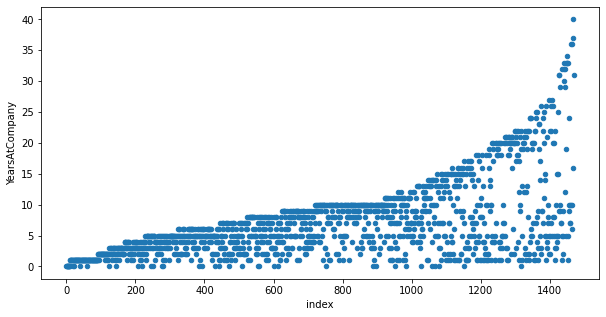

In [11]:
# Tambah kolom index
attrition_pop_id = attrition.reset_index()

# Plot YearsAtCompany vs. index 
attrition_pop_id.plot(x='index',y='YearsAtCompany',kind='scatter',figsize=(10,5))
plt.show()

Terlihat pada nilai di kolom 'YearsAtCompany' terurut secara ascending. Jika kita menggunakan *Systematic Sampling* menggunakan suatu interval tanpa mengacak nya telebih dahulu maka sample yang didapat tidak akan representatif terhadap populasi

*Systematic Sampling* aman digunakan jika tidak terdapat suatu pola didalam scatterplot

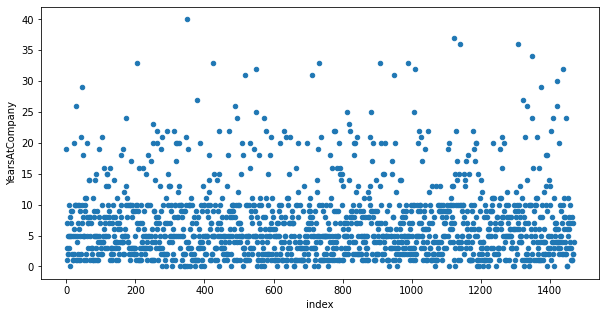

In [12]:
# Acak tiap baris
attrition_shuffled = attrition.sample(frac=1)


attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()


attrition_shuffled.plot(x='index',y='YearsAtCompany',kind='scatter',figsize=(10,5))
plt.show()

*Systematic Sampling* tidak akan menghasilkan sampel yang mirip dengan *Simple Random Sampling* jika data diurutkan dengan cara tertentu.

### Stratified and weighted random sampling

- *Stratified Sampling* adalah suatu teknik yang memungkinkan kita untuk mengambil sampel populasi yang berisi subkelompok.
- *Stratified Sampling* dilakukan dengan cara membagi seluruh populasi menjadi kelompok-kelompok homogen yang disebut strata.
- *Stratified sampling* berguna jika kita peduli tentang subkelompok

#### **Proportional stratified sampling**
- *Proportional stratified sampling* menghasilkan ukuran subkelompok dalam sampel yang mewakili ukuran subkelompok dalam populasi. 

In [13]:
# Proporsi karyawan berdasarkan tingkat Pendidikan
education_counts_pop = attrition['Education'].value_counts(normalize=True)

# Sample 10% dari data
education_samp = attrition.sample(frac=0.1,random_state=2022)
education_counts_samp = education_samp['Education'].value_counts(normalize=True)


# Print education_counts_pop
print("Proporsi Tingkat Pendidikan Karyawan Pada Populasi")
print(education_counts_pop)

# Print education_counts_pop
print("\nProporsi Tingkat Pendidikan Karyawan Pada Sample")
print(education_counts_samp)

Proporsi Tingkat Pendidikan Karyawan Pada Populasi
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

Proporsi Tingkat Pendidikan Karyawan Pada Sample
Bachelor         0.414966
Master           0.258503
College          0.190476
Below_College    0.122449
Doctor           0.013605
Name: Education, dtype: float64


Dapat terlihat bahwa sampel tidak mempresentasikan subkelompok yang ada pada populasi dimana jumlah dari tiap subkelompok pada sampel terlihat berbeda dengan yang berada pada populasi

In [14]:
# Proporsi karyawan berdasarkan tingkat Pendidikan
education_counts_pop = attrition['Education'].value_counts(normalize=True)

# Print education_counts_pop
print("Proporsi Tingkat Pendidikan Karyawan Pada Populasi")
print(education_counts_pop)

# Proportional stratified sampling untuk 40% dari setiap kelompok Pendidikan
attrition_strat = attrition.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Hitung proporsi tingkat Pendidikan dari attrition_strat
education_counts_strat = attrition['Education'].value_counts(normalize=True)

# Print education_counts_strat
print("\nProporsi Tingkat Pendidikan Karyawan Pada Sampel")
print(education_counts_strat)

Proporsi Tingkat Pendidikan Karyawan Pada Populasi
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

Proporsi Tingkat Pendidikan Karyawan Pada Sampel
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


Dengan Proportional stratified sampling maka proporsi dari tiap subkelas pada populasi dan sampel akan sama

#### **Equal counts stratified sampling**

Jika satu subkelompok lebih besar dari subkelompok lain dalam populasi, tetapi kita tidak ingin mencerminkan perbedaan itu dalam analisis kita, maka kita dapat menggunakan **equal counts stratified sampling** untuk menghasilkan sampel di mana setiap subkelompok memiliki jumlah data yang sama. 

Misalnya, jika kita menganalisis golongan darah, O adalah golongan darah yang paling umum di seluruh dunia, tetapi kita mungkin ingin memiliki jumlah O, A, B, dan AB yang sama dalam sampel kita.

In [15]:
# Dapatkan 30 karyawan dari setiap grup Pendidikan
attrition_eq = attrition.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Dapatkan proporsi dari attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print Hasil
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Jika kita ingin setiap subkelompok memiliki bobot yang sama dalam analisis kita, maka **equal counts stratified sampling** adalah teknik yang tepat.

#### **Weighted sampling**

*Stratified sampling* menyediakan aturan tentang probabilitas suatu baris dari dataset kita di tingkat subkelompok. Generalisasi dari hal ini adalah **Weighted sampling**, yang memungkinkan kita menentukan aturan tentang probabilitas pemilihan suatu baris. Probabilitas memilih baris tertentu sebanding dengan nilai bobot untuk baris tersebut.

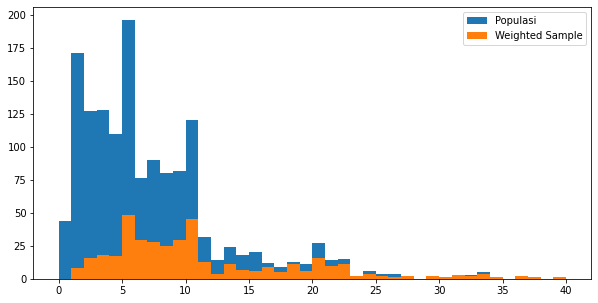

In [16]:
# Sample 400 karyawan yang dibobotkan dengan YearsAtCompany
attrition_weight = attrition.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany dari attrition_weight sebagai histogram
attrition['YearsAtCompany'].hist(bins=np.arange(0, 41, 1),label='Populasi')
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1),figsize=(10,5),label='Weighted Sample')
plt.grid(False)
plt.legend()
plt.show()

In [17]:
print(f'Rata - rata kolom YearsAtCompany pada populasi : {attrition["YearsAtCompany"].mean()}')
print(f'Rata - rata kolom YearsAtCompany pada sampel   : {attrition_weight["YearsAtCompany"].mean()}')

Rata - rata kolom YearsAtCompany pada populasi : 7.0081632653061225
Rata - rata kolom YearsAtCompany pada sampel   : 10.875


Rata-rata *Weighted sampling* adalah sekitar 11, yang lebih tinggi dari rata-rata populasi sekitar 7. Fakta bahwa kedua angka tersebut berbeda berarti bahwa *Weighted sampling* itu bias.

### Cluster Sampling

Satu masalah dengan *stratified sampling* adalah bahwa kita perlu mengumpulkan data dari setiap subkelompok. Dalam kasus-kasus di mana pengumpulan data itu mahal, misalnya, ketika kita harus melakukan perjalanan secara fisik ke suatu lokasi untuk mengumpulkannya, hal itu dapat membuat analisis kita menjadi sangat mahal. Ada alternatif yang lebih murah yang disebut **cluster sampling**.

**Stratified Sampling**:
- Membagi populasi menjadi subkelompok
- Menggunakan *simple random sampling* pada masing-masing subkelompok

**Cluster Sampling**:
- Menggunakan *simple random sampling* untuk pemilihan subkelompok
- Menggunakan *simple random sampling* pada masing-masing subkelompok tersebut


**Cluster Sampling Stage**:
- 1. *Sampling* untuk subkelompok : Tahap pertama **cluster sampling** adalah mengurangi jumlah varietas secara acak, dan kita melakukan ini dengan memilihnya secara acak.
- 2. *Sampling* setiap kelompok : Tahap kedua dari **cluster sampling** adalah melakukan *simple random sampling* pada masing-masing varietas yang kita pilih secara acak.

#### **Performing cluster sampling**

Stage 1: Sampling untuk subkelompok

In [18]:
import random
job_roles_pop = list(attrition['JobRole'].unique())


job_roles_samp = random.sample(job_roles_pop,k=4)

print(f'Semua subkelompok      : {job_roles_pop}')
print(f'\nSampling 4 subkelompok : {job_roles_samp}')

Semua subkelompok      : ['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager']

Sampling 4 subkelompok : ['Manager', 'Human_Resources', 'Sales_Representative', 'Healthcare_Representative']


Stage 2: Sampling setiap kelompok

In [19]:
# Filter untuk baris tempat JobRole ada di job_roles_samp
jobrole_condition = attrition['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition[jobrole_condition]

# Hapus kategori yang tidak memiliki baris
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

#Sampel secara acak 10 karyawan dari setiap peran
attrition_clust = attrition_filtered.groupby("JobRole")\
    .sample(n=10, random_state=2022)

attrition_clust.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_11132/247177218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
812,31,0.0,Travel_Rarely,616,Research_Development,12,Bachelor,Medical,Very_High,Female,...,Excellent,High,2,10,2,Bad,9,7,8,5
1190,38,0.0,Travel_Rarely,1495,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,High,1,18,4,Better,1,0,0,0
378,33,0.0,Travel_Rarely,1069,Research_Development,1,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Low,0,6,3,Better,5,0,1,4
920,35,0.0,Travel_Frequently,1199,Research_Development,18,Master,Life_Sciences,High,Male,...,Excellent,Very_High,2,10,2,Best,10,2,0,2
917,33,0.0,Travel_Rarely,501,Research_Development,15,College,Medical,Medium,Female,...,Excellent,Low,1,10,6,Better,9,7,8,1


Multistage sampling

- *Cluster Sampling* adalah jenis pengambilan sampel bertingkat
- Dapat memiliki > 2 Stage
- Misalnya, survei di seluruh negeri dapat mengambil sampel provinsi, kabupaten, kota, dan lingkungan sekitar

**Jangan gunakan** cluster sampling jika fokusnya adalah membandingkan subkelompok tertentu dalam populasi.

### Sampling Distributions

Bagaimana mengukur keakuratan statistik sampel dengan menggunakan *relative error*, dan mengukur variasi dalam estimasi kita dengan menghasilkan distribusi dari sampling.

#### **Calculating relative errors**

Ukuran sampel yang kita ambil mempengaruhi seberapa akurat titik estimasi mencerminkan parameter populasi yang sesuai. Misalnya, ketika kita menghitung rata-rata sampel, kita ingin agar mendekati rata-rata populasi. Namun, jika sampel kita terlalu kecil, ini mungkin tidak terjadi.

Metrik yang paling umum untuk menilai akurasi adalah *relative errors*. Ini adalah perbedaan absolut antara parameter populasi dan titik estimasi, semuanya dibagi dengan parameter populasi. Kadang-kadang dinyatakan sebagai persentase.

In [20]:
#Rata-rata kolom attrition pada populasi
mean_attrition_pop = attrition['Attrition'].mean()

def attrSamp(sample):
    # Hasilkan sampel acak 
    attrition_srs50 = attrition.sample(n=sample,random_state=2022)

    # Hitung rata rata pada sample
    mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

    # Hitung persentase kesalahan relatif
    rel_error_pct= round(100 * abs(mean_attrition_pop-mean_attrition_srs50) / mean_attrition_pop,2)

    return rel_error_pct


print(f'Persentase error sample 50  : {attrSamp(50)}')
print(f'Persentase error sample 100 : {attrSamp(100)}')

Persentase error sample 50  : 62.78
Persentase error sample 100 : 6.96


Ketika kita meningkatkan ukuran sampel, rata-rata sampel umumnya akan semakin dekat dengan rata-rata populasi, dan kesalahan akan relatif menurun.

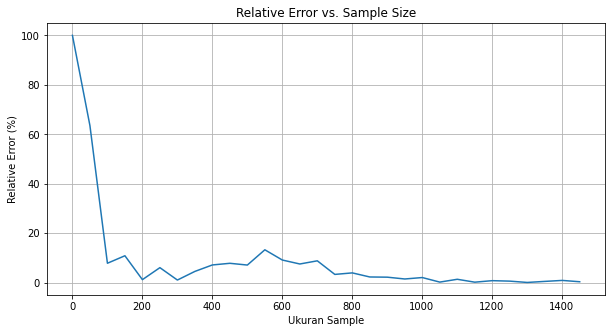

In [21]:
nSamp = []
error = []

for i in np.arange(1,1500,50):
    nSamp.append(i)
    error.append(attrSamp(i))


plt.figure(figsize=(10,5))
plt.plot(nSamp, error)
plt.xlabel('Ukuran Sample')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error vs. Sample Size')
plt.grid(True)
plt.show()

### **Replicating samples**

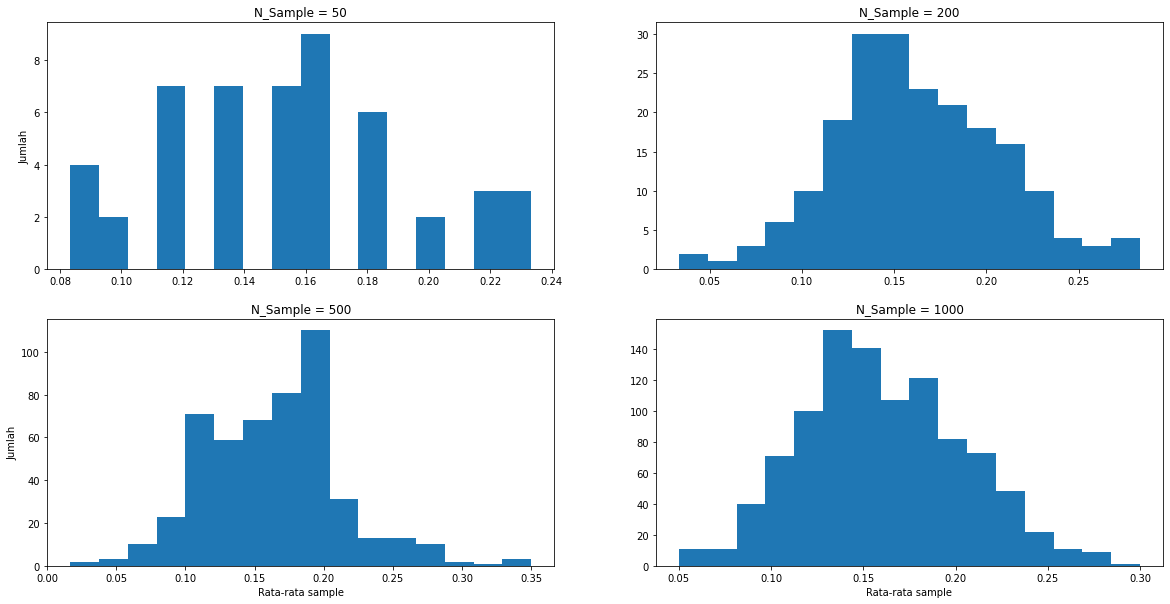

In [22]:
def replicate(n_replicas):
    #Buat list kosong
    mean_attritions = []
    # Loop sebanyak jumlah replica
    for i in range(n_replicas):
        mean_attritions.append(
            attrition.sample(n=60)['Attrition'].mean()
        )
    return mean_attritions
    

n50 = replicate(50) #Jumlah replica 50
n200 = replicate(200) #Jumlah replica 200
n500 = replicate(500) #Jumlah replica 500
n1000 = replicate(1000) #Jumlah replica 1000


plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('N_Sample = 50')
plt.ylabel('Jumlah')
plt.hist(n50,bins=16)


plt.subplot(2,2,2)
plt.hist(n200,bins=16)
plt.title('N_Sample = 200')

plt.subplot(2,2,3)
plt.hist(n500,bins=16)
plt.ylabel('Jumlah')
plt.xlabel("Rata-rata sample")
plt.title('N_Sample = 500')

plt.subplot(2,2,4)
plt.hist(n1000,bins=16)
plt.xlabel("Rata-rata sample")
plt.title('N_Sample = 1000')


plt.show()

Seiring dengan bertambahnya ukuran sampel, rata-rata setiap rata-rata sampel memiliki *relative error* yang lebih rendah dibandingkan dengan rata-rata populasi, sehingga mengurangi kisaran distribusi.

### Standard errors and the Central Limit Theorem

Prinsip statistik bahwa jumlah nilai independen dari distribusi apapun akan mendekati distribusi normal seperti jumlah nilai dalam distribusi meningkat. Dengan kata lain, Ukuran sampel lebih besar, semakin dekat distribusi sampling mendekati distribusi normal

*Rata-rata dari sampel independen akan memiliki distribusi normal*

Dengan bertambahnya ukuran sampel:
- Distribusi dari rata-rata sample semakin mendekati distribusi normal
- Lebar dari distribusi sampling semakin sempit

Standard error
- Standar deviasi dari distribusi sampling
- Alat penting dalam memahami variabilitas sampling

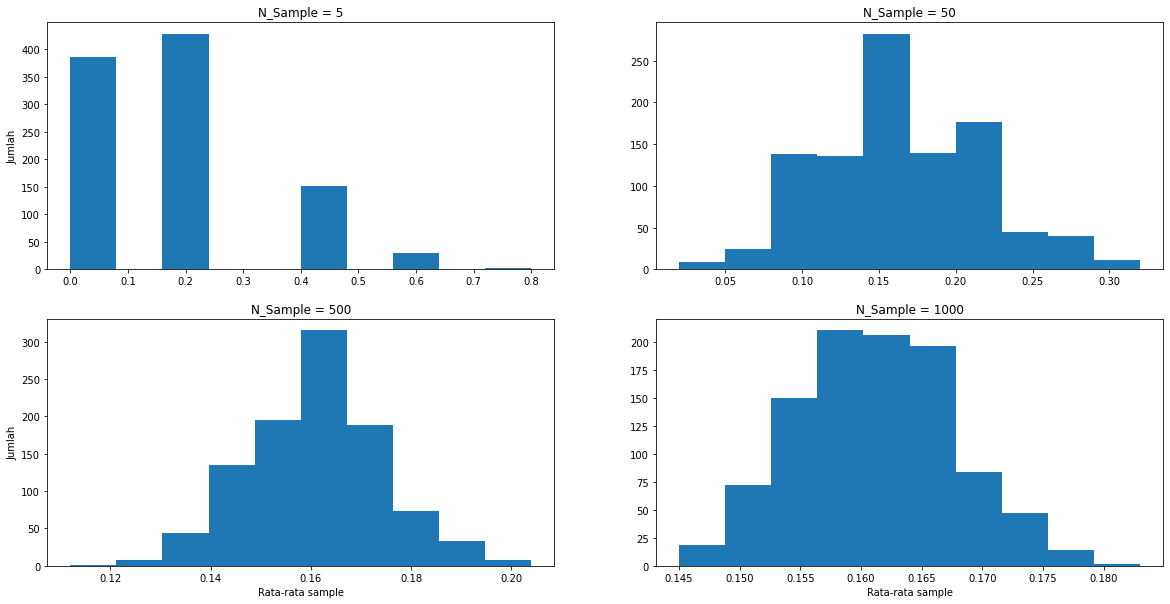

In [23]:
def mean_of_means(n_sample):
    #Buat list kosong
    mean_attritions = []
    # Loop sebanyak jumlah replica
    for i in range(1000):
        mean_attritions.append(
            attrition.sample(n=n_sample)['Attrition'].mean()
        )
    return mean_attritions

mean_of_means_5 = mean_of_means(5)
mean_of_means_50 = mean_of_means(50)
mean_of_means_500 = mean_of_means(500)
mean_of_means_1000 = mean_of_means(1000)


plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('N_Sample = 5')
plt.ylabel('Jumlah')
plt.hist(mean_of_means_5)


plt.subplot(2,2,2)
plt.hist(mean_of_means_50)
plt.title('N_Sample = 50')

plt.subplot(2,2,3)
plt.hist(mean_of_means_500)
plt.ylabel('Jumlah')
plt.xlabel("Rata-rata sample")
plt.title('N_Sample = 500')

plt.subplot(2,2,4)
plt.hist(mean_of_means_1000)
plt.xlabel("Rata-rata sample")
plt.title('N_Sample = 1000')

plt.show()

In [24]:
print(np.mean(mean_of_means_5))
print(np.mean(mean_of_means_50))
print(np.mean(mean_of_means_500))
print(np.mean(mean_of_means_1000))

0.1668
0.1592
0.160716
0.161195
